<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Machine%20Learning%20Course/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Bank Marketing Campaign (Target Customer Prediction) using Decision Tree**

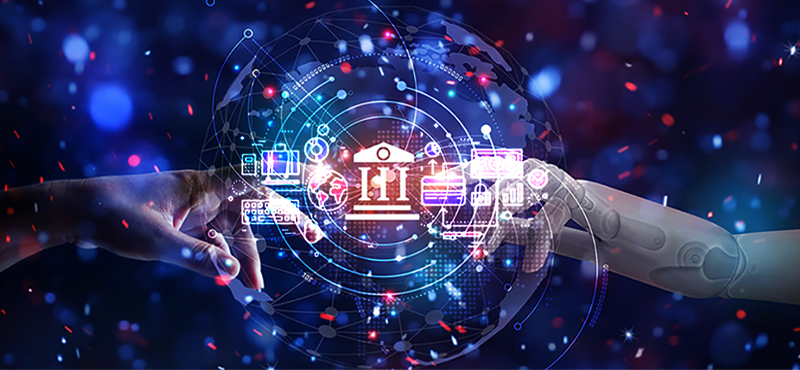

- Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

- Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. 

- Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.


### Bank Marketing Dataset
- Follow this link to download the data:
https://drive.google.com/uc?export=download&id=1tqPWmOoKq5qhnYshWfhfn4v6o_9Fe8Z1
- Follow this link to understand more about Data: https://www.kaggle.com/competitions/bank-marketing-uci/overview







# Decision Tree Classification - Data Analytics

Importing the dataset file/url

In [ ]:
train_url = "https://drive.google.com/uc?export=download&id=1tqPWmOoKq5qhnYshWfhfn4v6o_9Fe8Z1" 

Importing essential libraries for data understanding and Exploratory Data Analysis 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Variables

In [ ]:
# importing dataset
train = pd.read_csv(train_url,sep=";")
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# print the columns(feature variables) of the dataset
print(train.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (column/variable y in our data).

In [ ]:
# distinguish categorical and numerical columns
categorical = ["job","marital","education","default","housing","loan","contact","month","poutcome"]
numerical = ["age","balance","day","duration","campaign","pdays","previous"]

In [ ]:
# To check the data types of each column
datatypes = train.dtypes
print(datatypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [ ]:
# to check total missing values each column
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

It shows that we don't have any missing values in any columns. But there's one problem here, did you notice something in contact column from train.head(), we have missing values labelled as "unknown" in the dataset. So, we will treat them similar to missing values. Since, we have sufficient data, we can drop also those rows, that have unknown entries.

In [ ]:
# drop such rows that have entry as unknown
for feature in categorical:
  train = train[train[feature]!="unknown"]
len(train)

7842

In [ ]:
# replace values(yes or no) in y column(to 0 or 1) for better analysis 
train["y"] = train["y"].replace({"no": 0, "yes": 1})

## EDA - Univariate Analysis
If we analyze data over a single variable/column from a dataset, it is known as Univariate Analysis.

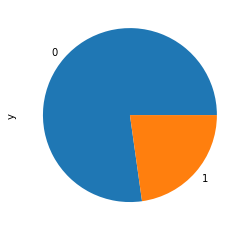

In [ ]:
# plot a pie chart to check classes in target column
train.y.value_counts().plot.pie()

In [ ]:
# To check counts of categories in Job column
train["job"].value_counts()

management       1753
blue-collar      1537
technician       1289
admin.           1057
services          682
retired           458
self-employed     264
student           237
entrepreneur      211
unemployed        208
housemaid         146
Name: job, dtype: int64

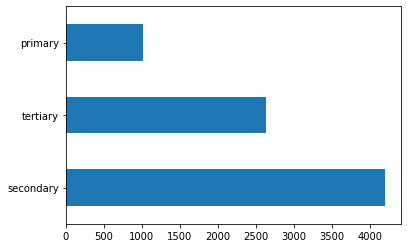

In [ ]:
# plot the bar graph for count of categories in Education column 
train["education"].value_counts().plot.barh()
plt.show()

In [ ]:
# If the column or variable is of numerical then we’ll analyze by calculating its mean, median, std, etc. Check using Balance column
train.balance.describe() 

count     7842.000000
mean      1552.343280
std       3084.580003
min      -1884.000000
25%        162.000000
50%        595.000000
75%       1733.750000
max      81204.000000
Name: balance, dtype: float64

## EDA - Bivariate Analysis
If we analyze data by taking two variables into consideration from a dataset, it is known as Bivariate Analysis.

In [ ]:
# Check the count distribution of target_variables accross poutcome
train.groupby(["poutcome"])["y"].value_counts()

poutcome  y
failure   0    4095
          1     584
other     0    1462
          1     288
success   1     914
          0     499
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


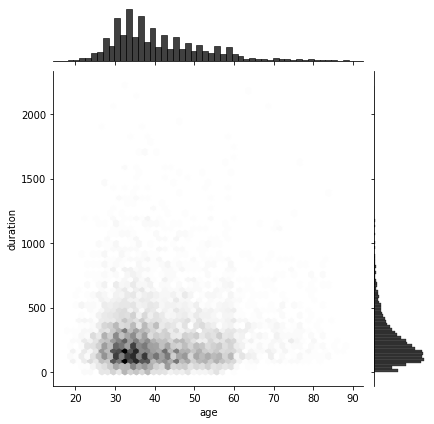

In [ ]:
# joint plot of age and duration
sns.jointplot('age','duration',train,kind="hex",color="k")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


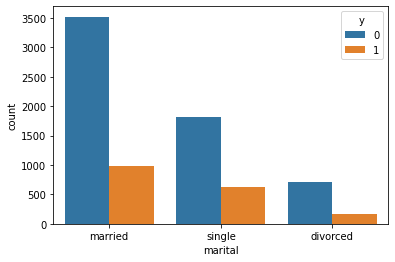

In [ ]:
# show countplot for marital status column with respect to target variable categories
sns.countplot(train['marital'],hue=train['y'])
# hue means a color or a shade so, here, hue="column name" means provide datapoints with different color for different classes of "column name"
plt.show()

What is a Box Plot?

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. 

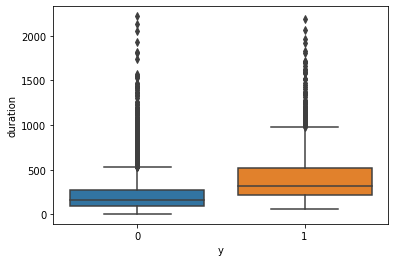

In [ ]:
# create a box plot for call duration vs target_variable
sns.boxplot(y=train.duration,x=train.y)
plt.show()

Successful marketing have a higher median and quartile ranges of the duration of call. 

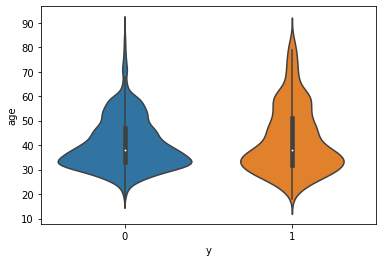

In [ ]:
# create a violin plot for AGE vs target variable
sns.violinplot(x=train.y,y=train.age)
plt.show()

more middle age(25-50) people tend to show lack of interest

## EDA - Multivariate Analysis
If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.

In [ ]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

job          admin.  blue-collar  entrepreneur  housemaid  management  \
education                                                               
primary    0.131579     0.083779      0.045455   0.240741    0.190476   
secondary  0.222607     0.125133      0.178571   0.175439    0.163934   
tertiary   0.276316     0.242424      0.085714   0.257143    0.297775   

job         retired  self-employed  services   student  technician  unemployed  
education                                                                       
primary    0.422360       0.066667  0.150943  0.411765    0.178571    0.428571  
secondary  0.408654       0.132530  0.160202  0.449367    0.183651    0.359375  
tertiary   0.438202       0.313253  0.222222  0.419355    0.277174    0.440678  


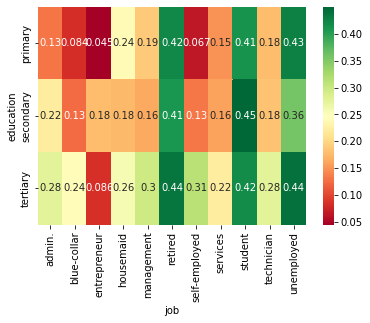

In [ ]:
# create pivot table of education vs job vs target_variable
result = pd.pivot_table(data=train, index='education', columns='job', values='y')
print(result)

# create heat map for the same
sns.heatmap(result, annot=True, cmap = 'RdYlGn')
plt.show()

The above heatmaps sums up everything:
- Bank marketing campaign are more successful among Students, unemployed and Retired.
- For other Job categories, we see that primary education people show much low interest or success rates. As the education increase among people, the success rate gets high.

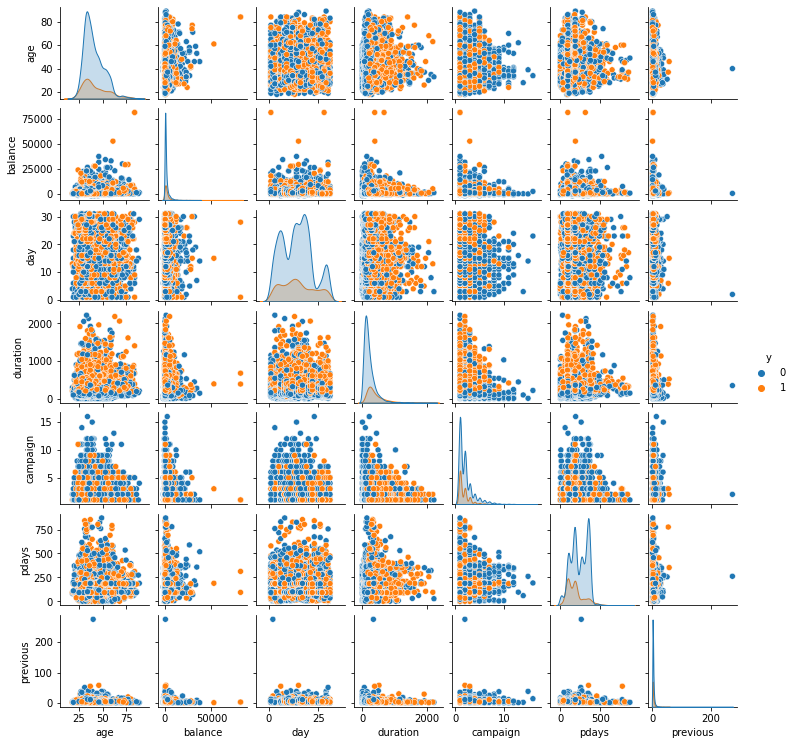

In [ ]:
# create a pairplot with the target variable as a class for segmentation
sns.pairplot(train,hue ='y',height = 1.5)
plt.show()

## Data Preprocessing

### Encoding Categories
Encoding categorical variables is very important if not crucial this is because machine learning models are mathematical models that use algorithms that work with numerical data types. This is why, we need encoding methods to convert non-numerical data to meaningful numerical data. For this we look at Pandas get_dummies method.

In [ ]:
# create dummies for categorical variables for train and test data
train_dummies = pd.get_dummies(train[categorical])
# concat the created dummies and drop those categorical columns
encoded_train = pd.concat([train,train_dummies],axis=1)
encoded_train.drop(categorical,axis=1,inplace=True)
encoded_train.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
24060,33,882,21,39,1,151,3,0,1,0,...,0,0,0,0,0,1,0,1,0,0
24062,42,-247,21,519,1,166,1,1,1,0,...,0,0,0,0,0,1,0,0,1,0
24064,33,3444,21,144,1,91,4,1,0,0,...,0,0,0,0,0,1,0,1,0,0
24072,36,2415,22,73,1,86,4,0,0,0,...,0,0,0,0,0,1,0,0,1,0
24077,36,0,23,140,1,143,3,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
# Creating X and Y
y = encoded_train["y"]
X = encoded_train.drop(["y"],axis=1) 
X.head(),y.head()

(       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
 24060   33      882   21        39         1    151         3           1   
 24062   42     -247   21       519         1    166         1           1   
 24064   33     3444   21       144         1     91         4           0   
 24072   36     2415   22        73         1     86         4           0   
 24077   36        0   23       140         1    143         3           0   
 
        job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  \
 24060                0                 0  ...          0          0   
 24062                0                 0  ...          0          0   
 24064                0                 0  ...          0          0   
 24072                0                 0  ...          0          0   
 24077                0                 0  ...          0          0   
 
        month_mar  month_may  month_nov  month_oct  month_sep  \
 24060          0          0   

In [ ]:
# Splitting Data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2) 

# Decision Tree Classification - Baseline Model Fitting

In [ ]:
# Initializing the Model 
from sklearn.tree import DecisionTreeClassifier
Classification_Tree = DecisionTreeClassifier()

In [ ]:
# Fitting the training data
Classification_Tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Generating Predictions
y_test_predictions = Classification_Tree.predict(X_test)
y_test_predictions

array([0, 1, 0, ..., 1, 0, 0])

### Intepreting results - Analyzing training and testing errors

In [ ]:
# To check Classification model training accuracy using sklearn
from sklearn.metrics import accuracy_score
accuracy_score(Classification_Tree.predict(X_train),y_train)

1.0

In [ ]:
# Check accuracy on test data
accuracy_score(Classification_Tree.predict(X_test),y_test)

0.7924528301886793

### Plot Classification Tree

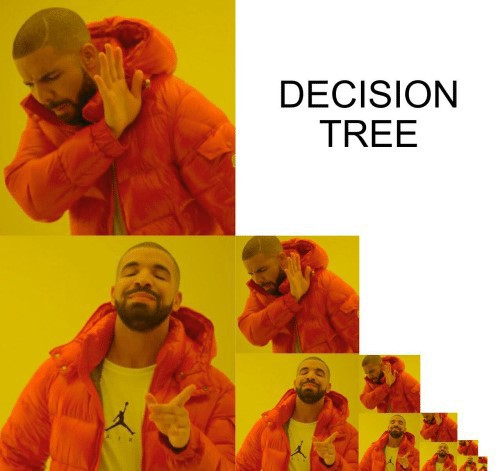

Close Enough🙂

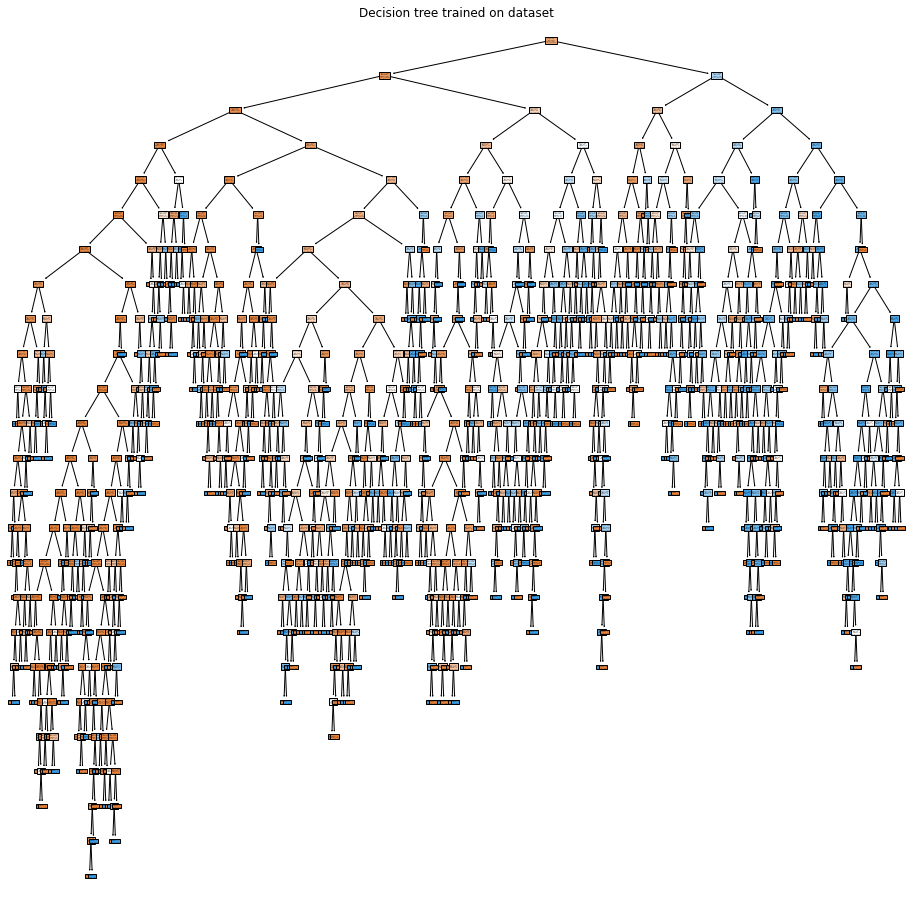

In [ ]:
# use sklearn to plot tree
from sklearn.tree import plot_tree
fig = plt.figure()
fig.set_size_inches(16,16)
plot_tree(Classification_Tree, filled=True)
plt.title("Decision tree trained on dataset")
plt.show()

## Introducing Hyperparameter Tuning - Hyperopt
Hyperparameters are different parameter values that decides the learning process and they significantly affect on the accuracy of machine learning models. 

Example of hyperparameters in the Decision Tree algorithm is the Minimum number of samples a node must possess before splitting(min_samples_split), maximum depth(max_depth), and criterion. These parameters are tunable and can directly affect how well model trains.

Then hyperparameter optimization is a process of finding the right combination of hyperparameter values in order to achieve maximum accuracy on the data in a reasonable amount of time. Therefore Hyperparameter optimization is considered the trickiest part of building machine learning models.

Most of these machine learning algorithms come with the default hyperparameters values. The default values do not always perform well on a different type of Machine Learning tasks you have, that's why you need to optimize them in order to get the right combination that will give you the best performance. 

**Hyperopt** is one of the advanced Hyperparameter optimization technique which uses a form of Bayesian optimization for parameter tuning that allows you to get the best parameters for a given model. It can optimize a model with hundreds of parameters on a large scale.

In [ ]:
# importing library for hyperparameter tuning 
import hyperopt 
from hyperopt.pyll.base import scope

### Search Space
If we are solving a problem, we are usually looking for some solution which will be the best among others. The space of all feasible solutions (the set of solutions among which the desired solution resides) is called search space. Each point in the search space represents one possible solution. The hyperopt have different functions to specify ranges for input parameters, these are stochastic search spaces. 

The most common options for a search space to choose are :

- hp.choice(label, options) — This can be used for categorical parameters, it returns one of the options, which should be a list or tuple.Example: hp.choice(“criterion”, [“gini”,”entropy”,])
- hp.uniform(label, low, high) — It returns a value uniformly between low and highExample: hp.uniform(“max_leaf_nodes”,1,10)
- hp.normal(label, mu, sigma) — This returns a real value that’s normally-distributed with mean mu and standard deviation sigma
- hp.qnormal(label, mu, sigma, q) — This returns a value like round(normal(mu, sigma) / q) * q
- hp. quniform(label, low, high, q) Returns a value like round(uniform(low, high) / q) * q. Suitable for a discrete value with respect to which the objective is still somewhat "smooth", but which should be bounded both above and below.


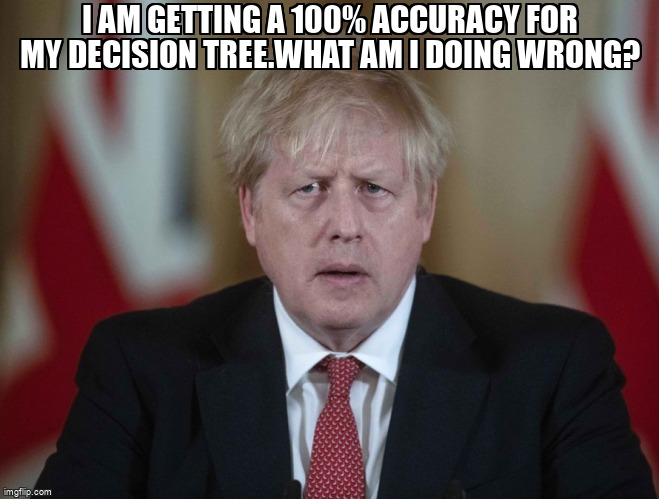

In [ ]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
# Define Parameter Space for Optimization
space = {
    "max_depth": hp.choice("max_depth", [i for i in range(1,31)]),    
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
}

In our case, we are looking for two parameters: criterion and max_depth. so we have two options for criterion, i.e gini and entropy. And we will be looking at value of max_depth from 1 to 30. 

### KFold Validation
K-Folds cross-validator provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default). Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

Why KFold validation?

Because it ensures that every observation from the original dataset has the chance of appearing in training and test set. This is one among the best approach if we have a limited input data.

In [ ]:
# import KFold from sklearn model selection and prepare a function for hyperparameter tuning for our hyperopt search space
from sklearn.model_selection import KFold
def hyperparameter_tuning(params):
    clf = DecisionTreeClassifier(**params)
    k = 5
    kf = KFold(n_splits=k, random_state=None)
    acc_score = []
    for train_index , test_index in kf.split(X_train):
      X_train_kf , X_test_kf = X_train.iloc[train_index],X_train.iloc[test_index]
      y_train_kf , y_test_kf = y_train.iloc[train_index] ,y_train.iloc[test_index]
      clf.fit(X_train_kf,y_train_kf)
      pred_values = clf.predict(X_test_kf)
      acc = accuracy_score(pred_values, y_test_kf)
      acc_score.append(acc)
    avg_acc_score = sum(acc_score)/k
    return {"loss": -avg_acc_score, "status": STATUS_OK}

fmin chooses the minimum of the losses that's why negative sign is used for finding maximum accuracy.

### Fit the Optimizer

In [ ]:
# Initialize trials object for fitting the optimizer
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 100/100 [00:38<00:00,  2.59it/s, best loss: -0.8408423352348586]
Best: {'criterion': 0, 'max_depth': 1}


In [ ]:
# print the results for trials
trials.results

[{'loss': -0.8246884735202492, 'status': 'ok'},
 {'loss': -0.8309796900918396, 'status': 'ok'},
 {'loss': -0.8326797923927429, 'status': 'ok'},
 {'loss': -0.8301302169125935, 'status': 'ok'},
 {'loss': -0.8330210843895758, 'status': 'ok'},
 {'loss': -0.8042847895317855, 'status': 'ok'},
 {'loss': -0.8117654708442424, 'status': 'ok'},
 {'loss': -0.8075146371207786, 'status': 'ok'},
 {'loss': -0.8070052999959543, 'status': 'ok'},
 {'loss': -0.8059851808182916, 'status': 'ok'},
 {'loss': -0.8029261237205162, 'status': 'ok'},
 {'loss': -0.8233290852449731, 'status': 'ok'},
 {'loss': -0.8231582947537553, 'status': 'ok'},
 {'loss': -0.8143162022668031, 'status': 'ok'},
 {'loss': -0.8056446112854656, 'status': 'ok'},
 {'loss': -0.804282622139765, 'status': 'ok'},
 {'loss': -0.801902970194025, 'status': 'ok'},
 {'loss': -0.8173782937134071, 'status': 'ok'},
 {'loss': -0.8076838381911813, 'status': 'ok'},
 {'loss': -0.8405027771516422, 'status': 'ok'},
 {'loss': -0.8405027771516422, 'status': '

In [ ]:
# print just losses for trials
trials.losses()

[-0.8246884735202492,
 -0.8309796900918396,
 -0.8326797923927429,
 -0.8301302169125935,
 -0.8330210843895758,
 -0.8042847895317855,
 -0.8117654708442424,
 -0.8075146371207786,
 -0.8070052999959543,
 -0.8059851808182916,
 -0.8029261237205162,
 -0.8233290852449731,
 -0.8231582947537553,
 -0.8143162022668031,
 -0.8056446112854656,
 -0.804282622139765,
 -0.801902970194025,
 -0.8173782937134071,
 -0.8076838381911813,
 -0.8405027771516422,
 -0.8405027771516422,
 -0.8405027771516422,
 -0.8405027771516422,
 -0.8408423352348586,
 -0.8408423352348586,
 -0.8408423352348586,
 -0.8408423352348586,
 -0.8214590594096602,
 -0.8024141857252672,
 -0.8304702084742137,
 -0.8245189834642439,
 -0.8398219270715932,
 -0.8117646038874342,
 -0.8408423352348586,
 -0.8090452493656766,
 -0.8049637612054168,
 -0.8199278691935568,
 -0.8061551043527011,
 -0.8032645258613215,
 -0.8083648327640317,
 -0.8068356654471474,
 -0.8364212889913825,
 -0.8224777336593091,
 -0.8333612204439975,
 -0.8059851808182916,
 -0.83234052

In [ ]:
# print just statuses for trials
trials.statuses()

['ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok']

## Comparing Baseline and Tuned Model

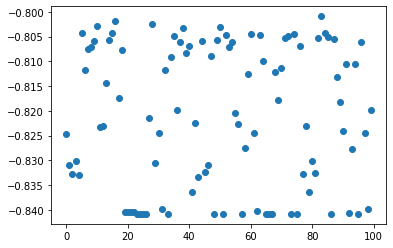

In [ ]:
# plot to check accuracies given in the trials
plt.scatter([i for i in range(len(trials.losses()))],trials.losses())

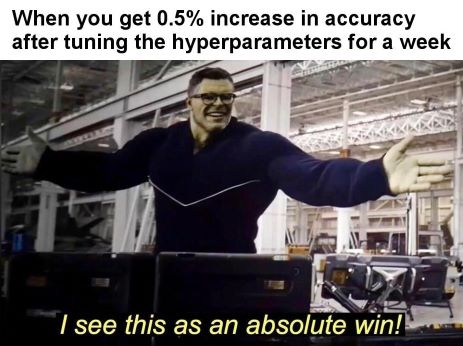

### training the tuned model
From above results we can say that entropy(index 1 of criterion) and max_depth = 2(index 1 of our choice max_depth) gives the highest accuracy among all after applying KFold cross validation on our training dataset which is why our these features are best predictors for any new data, i.e test data.

In [ ]:
# build new model for chosen parameters
clf = DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

### Analyzing train and test metrics

In [ ]:
# train accuracy
accuracy_score(clf.predict(X_train),y_train)

0.8413535113076007

In [ ]:
# test accuracy
accuracy_score(clf.predict(X_test),y_test)

0.8403875573686894

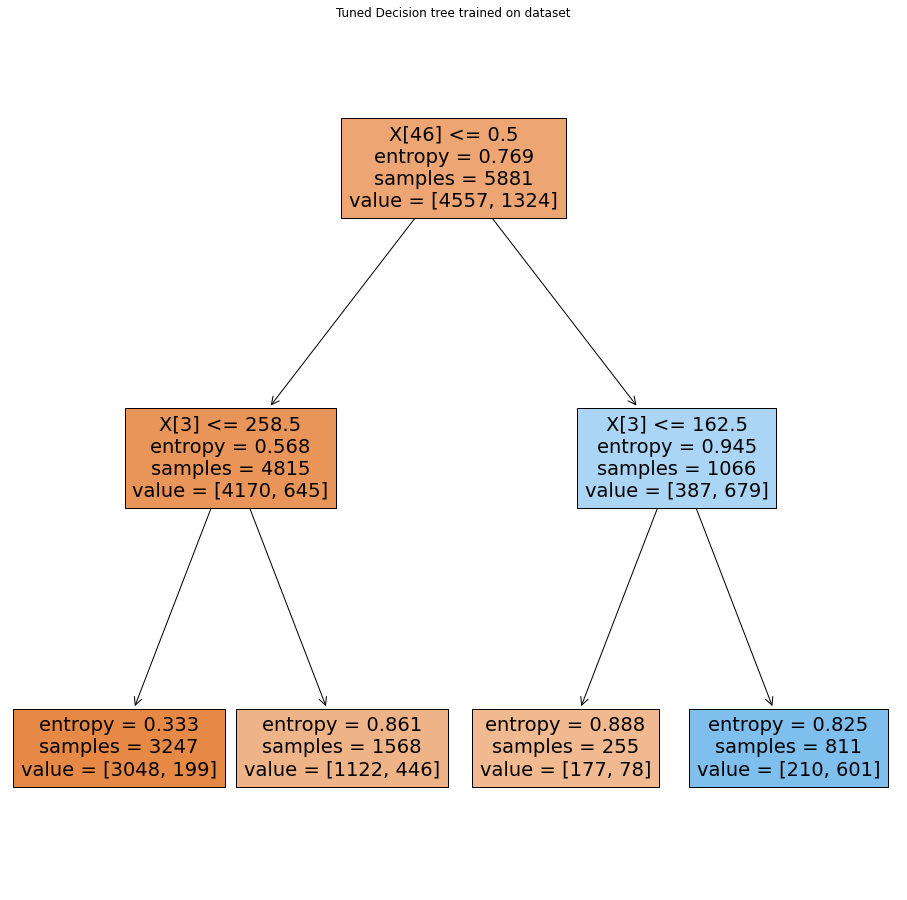

In [ ]:
# plot the tuned clf classifier tree 
fig = plt.figure()
fig.set_size_inches(16,16)
plot_tree(clf, filled=True)
plt.title("Tuned Decision tree trained on dataset")
plt.show()

In [ ]:
X.columns[46], X.columns[3]

('poutcome_success', 'duration')

### Comparison
We used KFold validation method on our training dataset to choose the best parameters among the choice so that we can better performance over our test data. With baseline model we obtained 79% accuracy over test data while we obtained above 84% accuracy after hyperparameter tuning. So, this is how we avoided overfitting in training set and calculated best parameters for our model so that we can achieve maximum accuracy over unknown(test) data which was our goal. 

We can also compare tree graphs of before and after hyperparameter tuning, how the latter graph looks more generalised and less complex than first one.

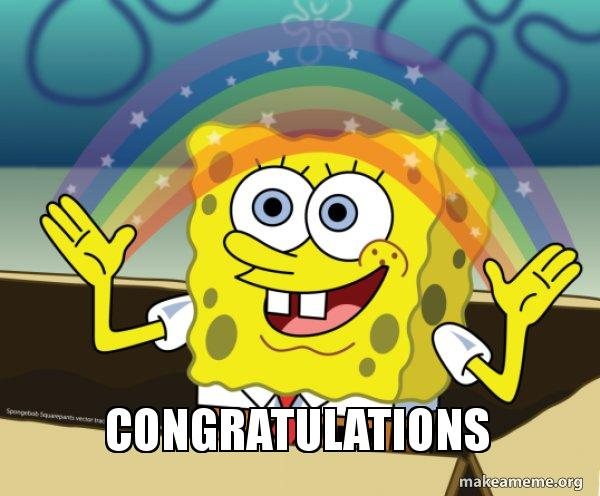

CONGRATULATIONS! You have completed Decision Tree Module with **Bank Marketing Campaign (Target Customer Prediction)** system 